# Exploratory Data Analysis on the California Housing Prices
<img></img>

### Importing Libraries

In [1]:
import os
import tarfile
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline 

### Importing the Dataset on California Housing Prices

In [2]:

dataset_path = os.path.join("dataset")
download_url="https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"

In [3]:
def fetch_data(download_url= download_url, dataset_path= dataset_path):
    os.makedirs(dataset_path, exist_ok= True)
    tgz_path = os.path.join(dataset_path,"housing.tgz")
    urllib.request.urlretrieve(download_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path= dataset_path)
    housing_tgz.close()

In [4]:
fetch_data()

In [5]:
def load_data(dataset_path= dataset_path):
    csv_path = os.path.join(dataset_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
df = load_data()

### Glance of the DataSet

In [7]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

### Cleaning and Filtering the data

In [8]:
df = df.drop_duplicates() 
df.duplicated().values.any()


False

In [9]:
df = df.fillna(method="ffill")
pd.isnull(df).any()  # Checking for Null Values

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

### Feature Engineering

In [10]:
df['avgRooms'] = df['total_rooms'] / df['households']
df['avgBedrooms'] = df['total_bedrooms'] / df['households']
df['pop_per_household'] = df['population'] / df['households']

In [11]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   avgRooms  avgBedrooms  pop_per_household  
0  6.984127     1.023810           2.555556  
1  6.238137     0.971880           2.109842  
2  8.288136     1.073446           2.802260  
3  5.817352     1.073059           2.547945  
4  6.281853     1.081081           2.181467

In [12]:
df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  avgRooms  avgBedrooms  pop_per_household  
20635          INLAND  5.045455     1.133333           2.560606  
20636          INLAND  6.114035     1.315789           3.122807  
20637          INLAND  5.205543     1.120092           2.325635  
20638          INLAND  5.329513     1.171920           2.123209  
20639          INLAND  5.254717     1.162264           2.616981

In [13]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.642151   1425.476744    499.539680       3.870671   
std        420.876678   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value      avgRooms   avgBedrooms  pop_per_household  
count        20640.000000  20640.000000  20640.000000       20640.000000  
mean        206855.816909      5.429000      1.102104           3.070655  
std         115395.615874      2.474173      0.548385          10.386050  
min          14999.000000      0.846154      0.008092           0.692308  
25%         119600.000000      4.440716      1.005552           2.429741  
50%         179700.000000      5.229129      1.048860           2.818116  
75%         264725.000000      6.052381      1.100079           3.282261  
max         500001.000000    141.909091     34.066667        1243.333333

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  avgRooms            20640 non-null  float64
 11  avgBedrooms         20640 non-null  float64
 12  pop_per_household   20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.2+ MB


In [15]:
df.shape

(20640, 13)

In [16]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'avgRooms', 'avgBedrooms',
       'pop_per_household'],
      dtype='object')

## Data Visualization

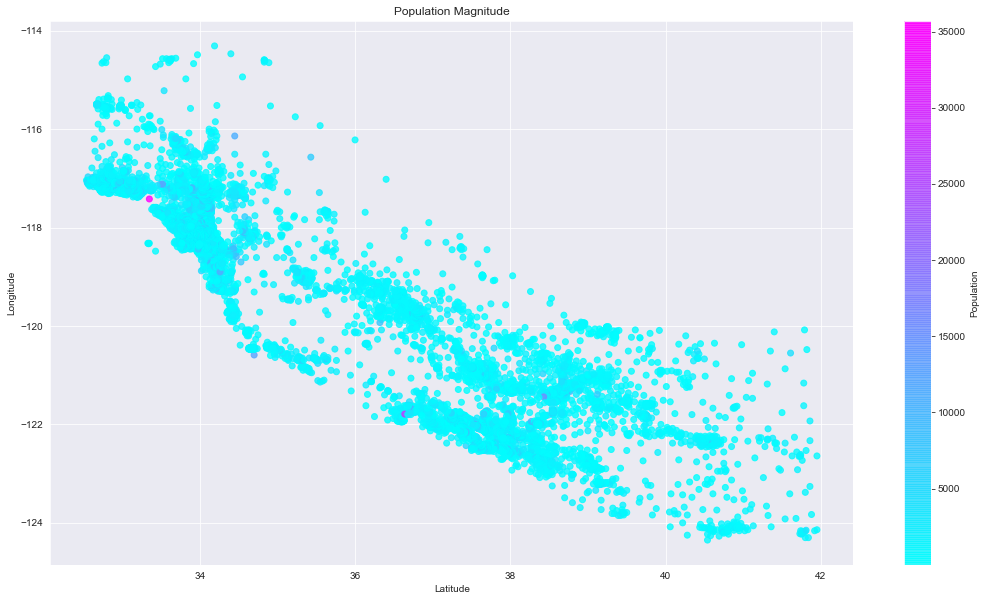

In [17]:

plt.figure(figsize=(18,10))
plt.scatter(df['latitude'],df['longitude'],c=df['population'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Population")
plt.title('Population Magnitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

## Average Distribution of Median Price of Housing in a Block

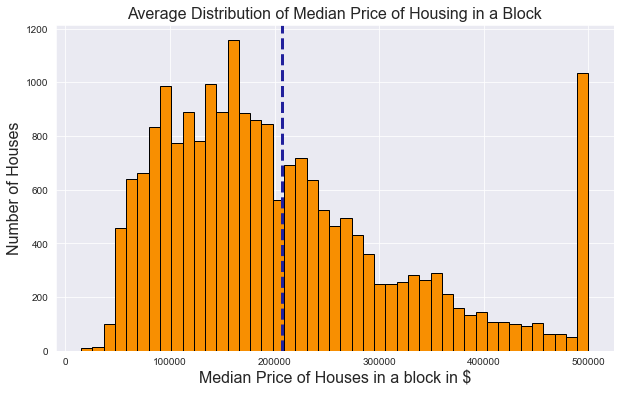

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df.median_house_value, bins = 45, ec = 'black', color = '#f88f01')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16)
plt.axvline(df['median_house_value'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Price of House in a block')
plt.show()
plt.style.use('dark_background')

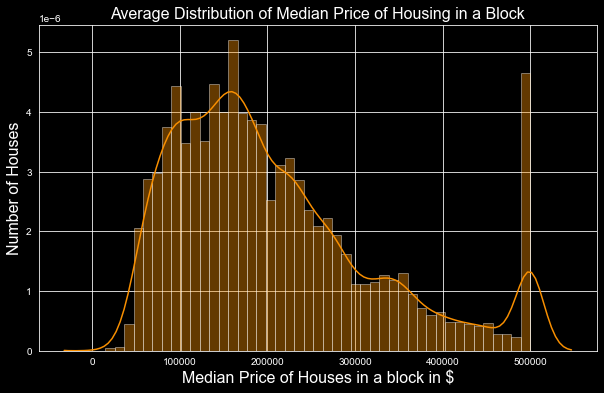

In [19]:
plt.figure(figsize=(10, 6))
sns.distplot(df.median_house_value, bins = 45, color = '#f88f01', hist = True)
plt.style.use('dark_background')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16)
plt.show()

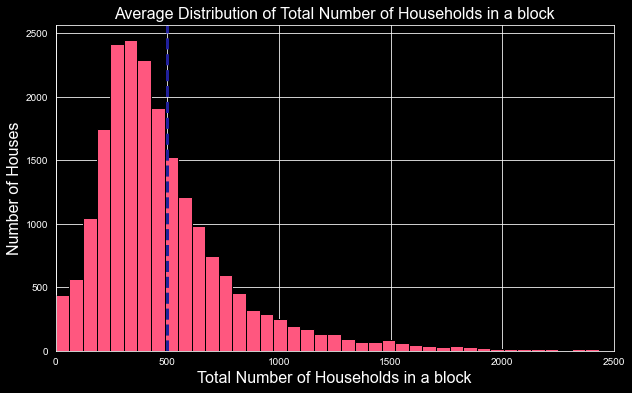

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df.households , bins=100, ec = 'black', color = '#ff577f')
plt.xlabel('Total Number of Households in a block', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Total Number of Households in a block', fontsize=16)
plt.axvline(df['households'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Number of Households in a block')
plt.xlim(0,2500)
plt.show()
plt.style.use('dark_background')

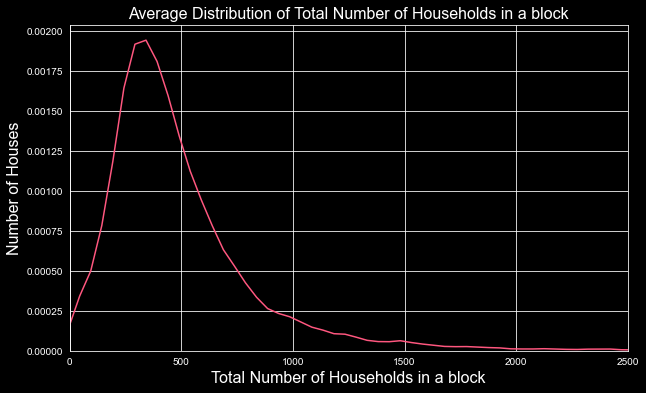

In [21]:
plt.figure(figsize=(10, 6))
sns.distplot(df.households , bins=100, color = '#ff577f', hist = False)
plt.xlabel('Total Number of Households in a block', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Total Number of Households in a block', fontsize=16)
plt.xlim(0,2500)

plt.show()
plt.style.use('dark_background')

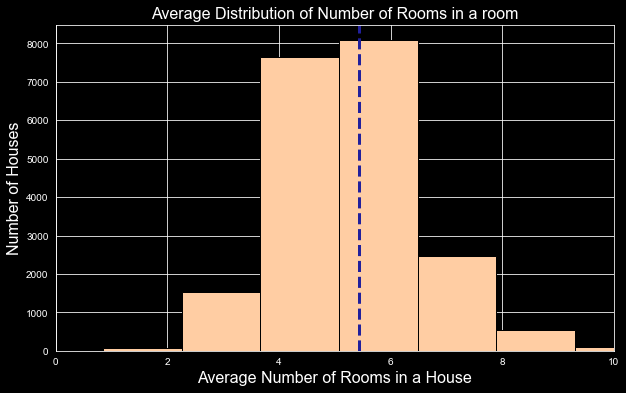

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df.avgRooms, bins=100, ec = 'black', color = '#ffcda3')
plt.xlabel('Average Number of Rooms in a House', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Number of Rooms in a room', fontsize=16)
plt.axvline(df['avgRooms'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Number of Rooms in a House')
plt.xlim(0, 10)
plt.show()
plt.style.use('dark_background')

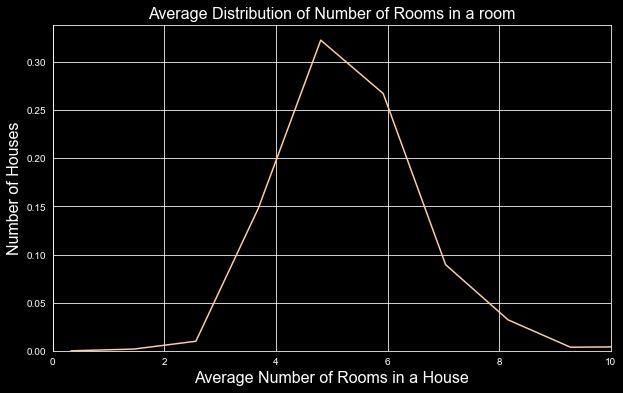

In [23]:
plt.figure(figsize=(10, 6))
sns.distplot(df.avgRooms, bins=100, color = '#ffcda3', hist = False)
plt.xlabel('Average Number of Rooms in a House', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Number of Rooms in a room', fontsize=16)
plt.xlim(0, 10)
plt.show()
plt.style.use('dark_background')

In [24]:
df.avgRooms.mean()

5.428999742190365

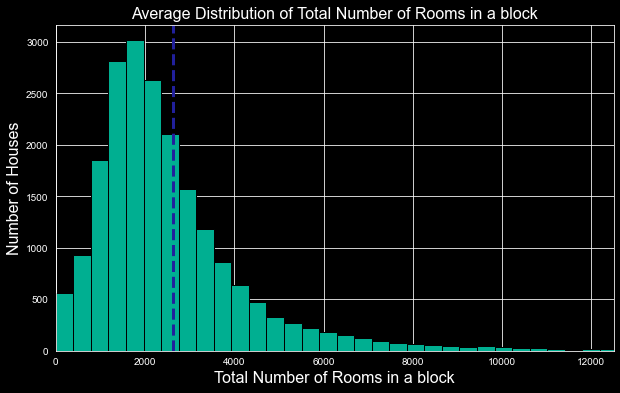

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df.total_rooms, bins=100, ec = 'black', color = '#00af91')
plt.xlabel('Total Number of Rooms in a block', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.axvline(df['total_rooms'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Number of Rooms in a block')

plt.title('Average Distribution of Total Number of Rooms in a block', fontsize=16)
plt.xlim(0, 12500)
plt.show()
plt.style.use('dark_background')

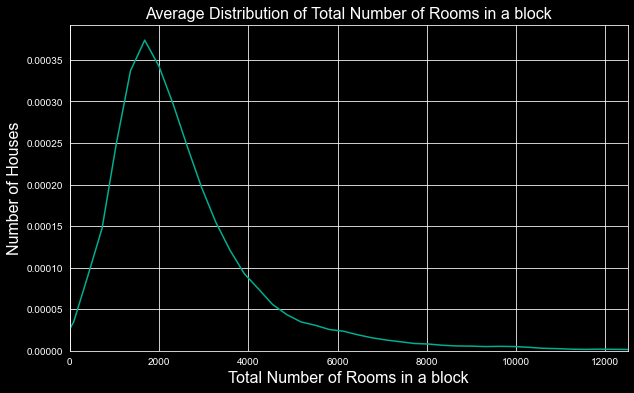

In [26]:
plt.figure(figsize=(10, 6))
sns.distplot(df.total_rooms, bins = 45, color = '#00af91', hist = False)
plt.xlabel('Total Number of Rooms in a block', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Total Number of Rooms in a block', fontsize=16)
plt.xlim(0, 12500)

plt.show()
plt.style.use('dark_background')

In [27]:
df.total_rooms.mean()

2635.7630813953488

## Ocean Proximity

In [28]:
freq = df.ocean_proximity.value_counts()
print(freq)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


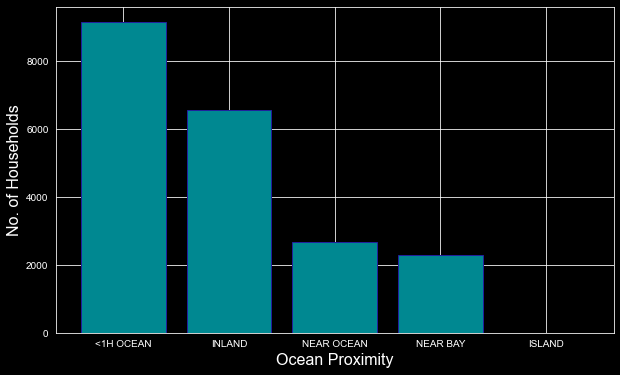

In [29]:
freq = df.ocean_proximity.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(freq.index, height = freq,ec='#21209c',color='#008891')
plt.xlabel('Ocean Proximity', fontsize=16)
plt.ylabel('No. of Households', fontsize=16)
plt.show()

### Correlation
### $$ \rho _{XY} = corr(X,Y)$$
### $$ -1.0 \leq \rho _{XY} \leq +1.0$$

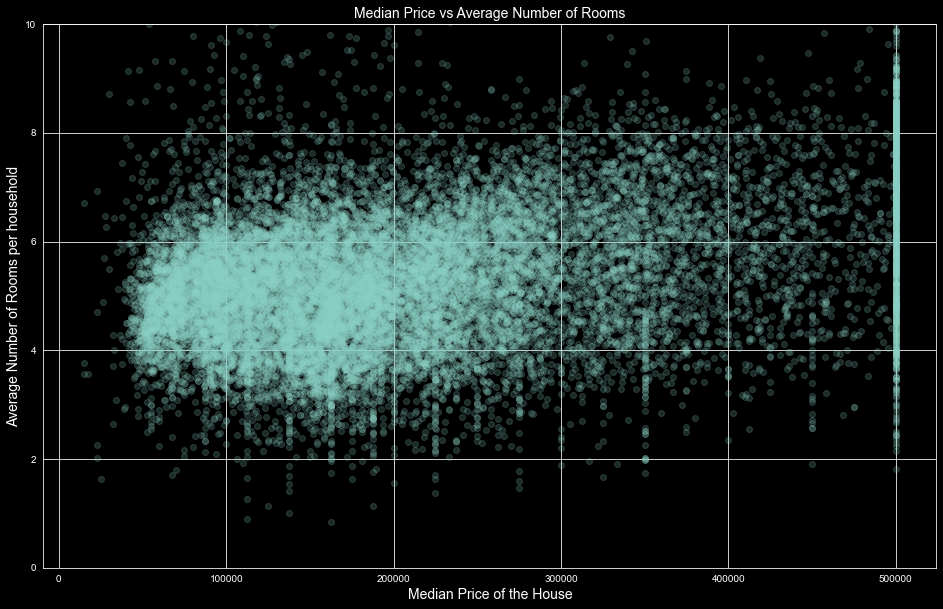

In [30]:
plt.figure(figsize=(16, 10))
plt.scatter(x= df['median_house_value'], y=df['avgRooms'], alpha=0.2)
plt.ylim(0, 10)

plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Average Number of Rooms per household', fontsize = 14)
plt.title('Median Price vs Average Number of Rooms', fontsize = 14)
plt.style.use('dark_background')
plt.show()


C:\Users\Arhit\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x720 with 0 Axes>

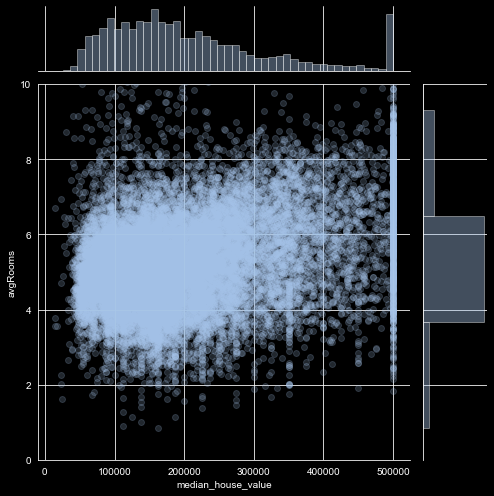

In [31]:
plt.figure(figsize=(12,10))
sns.jointplot(x=df['median_house_value'], y=df['avgRooms'], size = 7, color = '#a7c5eb', joint_kws={'alpha': 0.2})
sns.set_style('darkgrid')
plt.ylim(0, 10)
plt.style.use('dark_background')

plt.show()

In [32]:
df.median_house_value.corr(df.avgRooms)

0.1519482897414578

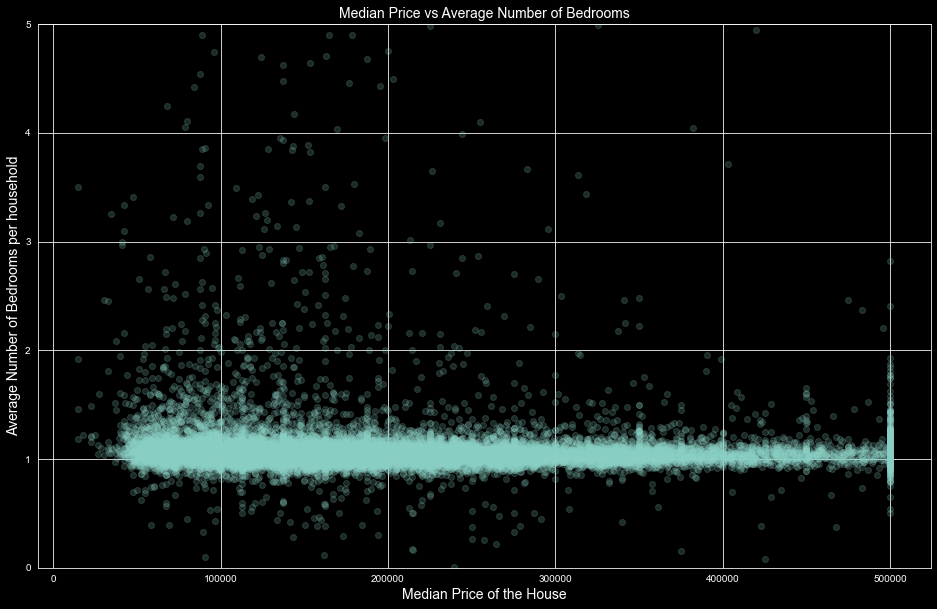

In [33]:
plt.figure(figsize=(16, 10))
plt.scatter(x= df['median_house_value'], y=df['avgBedrooms'], alpha=0.2)
plt.ylim(0, 5)

plt.style.use('dark_background')
plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Average Number of Bedrooms per household', fontsize = 14)
plt.title('Median Price vs Average Number of Bedrooms', fontsize = 14)
plt.show()

C:\Users\Arhit\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x720 with 0 Axes>

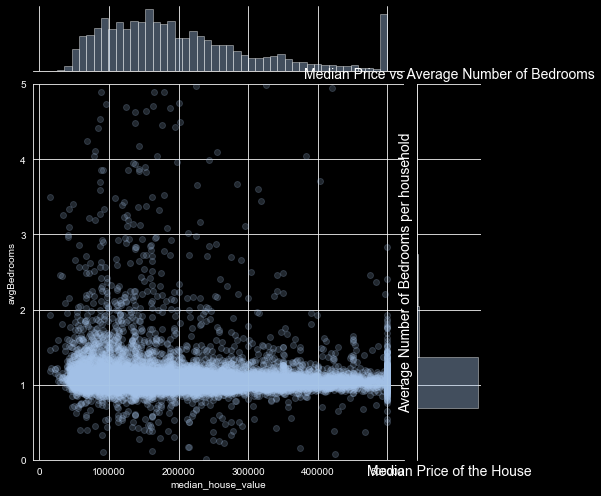

In [34]:
plt.figure(figsize=(16, 10))
sns.jointplot(x=df['median_house_value'], y=df['avgBedrooms'], size = 7, color = '#a7c5eb', joint_kws={'alpha': 0.2})
sns.set_style('darkgrid')
plt.ylim(0, 5)

plt.style.use('dark_background')
plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Average Number of Bedrooms per household', fontsize = 14)
plt.title('Median Price vs Average Number of Bedrooms', fontsize = 14)
plt.show()

In [35]:
df.median_house_value.corr(df.avgBedrooms)

-0.04321494098036476

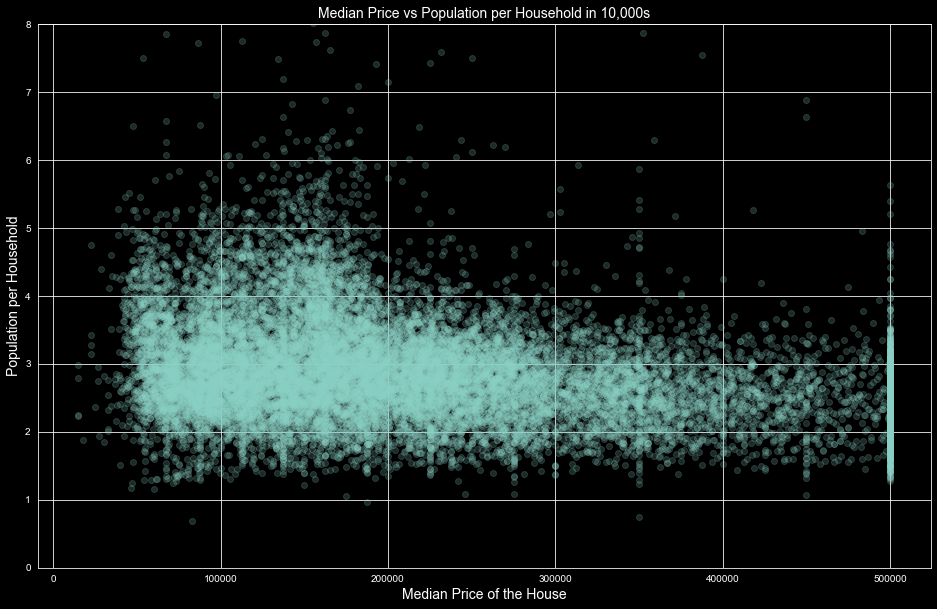

In [36]:
plt.figure(figsize=(16, 10))
plt.scatter(x= df['median_house_value'], y=df['pop_per_household'], alpha=0.2)
plt.ylim(0, 8)
plt.style.use('dark_background')

plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Population per Household', fontsize = 14)
plt.title('Median Price vs Population per Household in 10,000s', fontsize = 14)
plt.show()

C:\Users\Arhit\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x720 with 0 Axes>

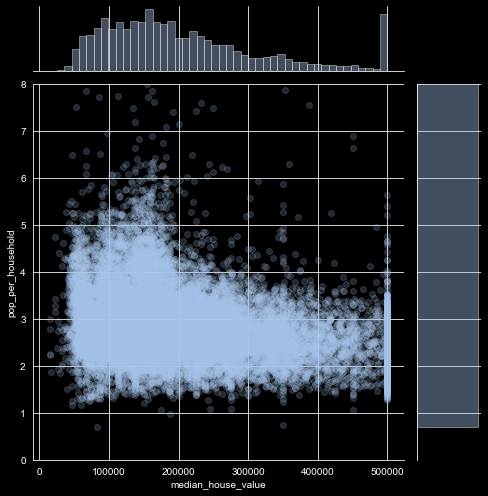

In [37]:
plt.figure(figsize=(16, 10))
sns.jointplot(x= df['median_house_value'], y=df['pop_per_household'] , size = 7, color = '#a7c5eb', joint_kws={'alpha': 0.2})
plt.ylim(0, 8)
plt.style.use('dark_background')


plt.show()

In [38]:
df.median_house_value.corr(df.pop_per_household)

-0.02373741295613434

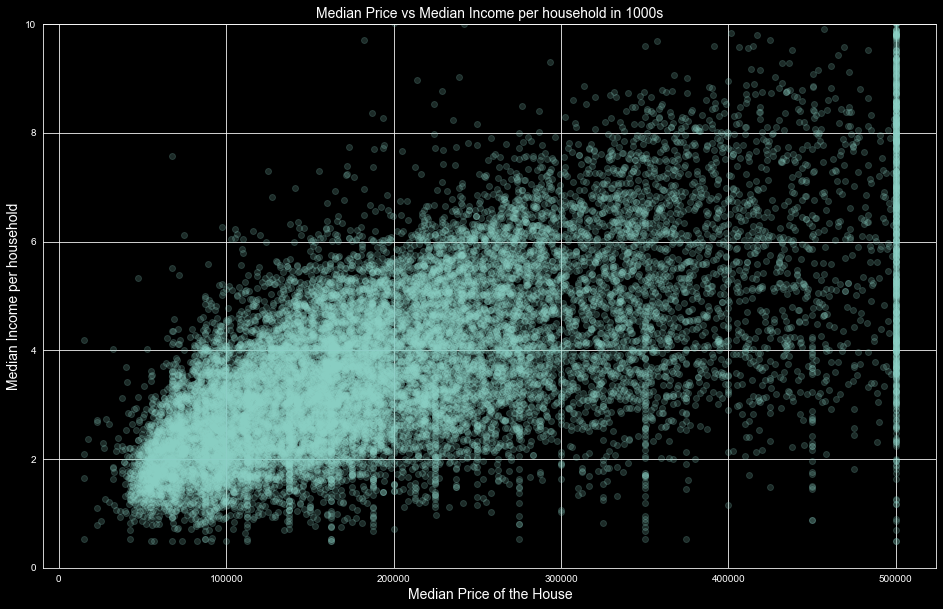

In [39]:
plt.figure(figsize=(16, 10))
plt.scatter(x= df['median_house_value'], y=df['median_income'], alpha=0.2)
plt.ylim(0, 10)
plt.style.use('dark_background')
plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Median Income per household', fontsize = 14)
plt.title('Median Price vs Median Income per household in 1000s', fontsize = 14)
plt.show()

C:\Users\Arhit\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x720 with 0 Axes>

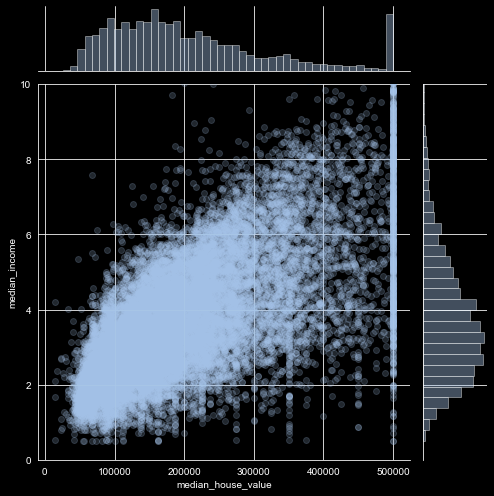

In [40]:
plt.figure(figsize=(16, 10))
sns.jointplot(x= df['median_house_value'], y=df['median_income'], size = 7, color = '#a7c5eb', joint_kws={'alpha': 0.2})
plt.ylim(0, 10)
plt.style.use('dark_background')

plt.show()

In [41]:
df.median_house_value.corr(df.median_income)

0.688075207958548

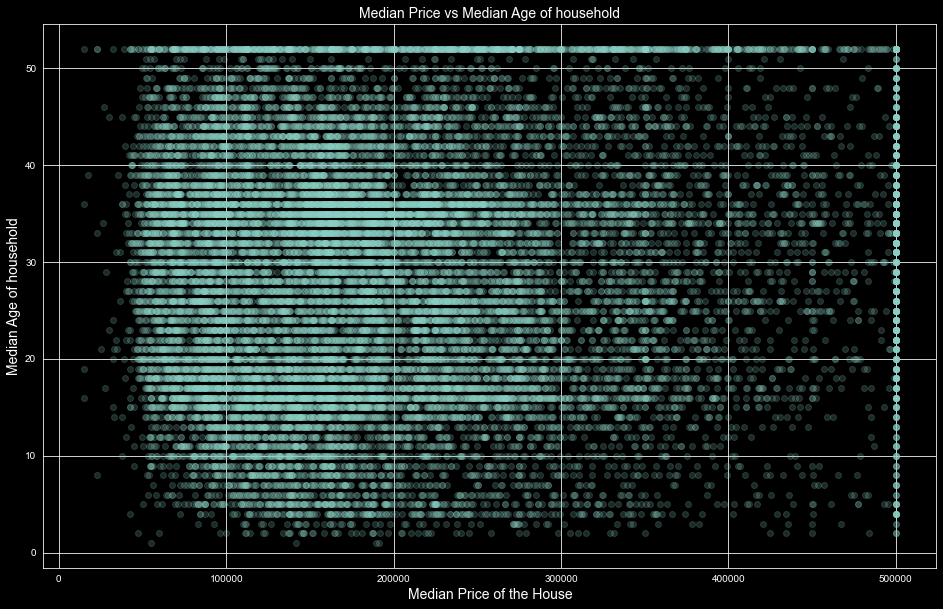

In [42]:
plt.figure(figsize=(16, 10))
plt.scatter(x= df['median_house_value'], y=df['housing_median_age'], alpha=0.2)
plt.style.use('dark_background')

plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Median Age of household', fontsize = 14)
plt.title('Median Price vs Median Age of household', fontsize = 14)
plt.show()

C:\Users\Arhit\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x720 with 0 Axes>

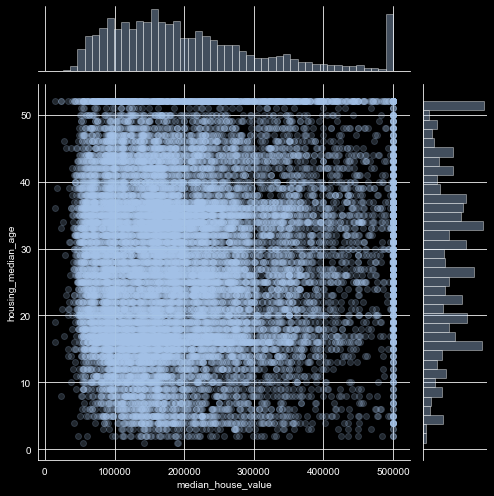

In [43]:
plt.figure(figsize=(16, 10))
sns.jointplot(x= df['median_house_value'], y=df['housing_median_age'], size = 7, color = '#a7c5eb', joint_kws={'alpha': 0.2})

plt.style.use('dark_background')

plt.show()

In [44]:
df.median_house_value.corr(df.housing_median_age)

0.10562341249320994

In [45]:
df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.070442 -0.067535           -0.319312     0.925347   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
avgRooms            -0.027540  0.106389           -0.153277     0.133798   
avgBedrooms          0.016723  0.057120           -0.059806     0.013346   
pop_per_household    0.002476  0.002366            0.013191    -0.024581   

                    total_bedrooms  population  households  median_income  \
longitude                 0.070442    0.099773    0.055310      -0.015176   
latitude                 -0.067535   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.319312   -0.296244   -0.302916      -0.119034   
total_rooms               0.925347    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.872491    0.972942      -0.007473   
population                0.872491    1.000000    0.907222       0.004834   
households                0.972942    0.907222    1.000000       0.013033   
median_income            -0.007473    0.004834    0.013033       1.000000   
median_house_value        0.049294   -0.024650    0.065843       0.688075   
avgRooms                  0.001913   -0.072213   -0.080598       0.326895   
avgBedrooms               0.052580   -0.070148   -0.061542      -0.044738   
pop_per_household        -0.028243    0.069863   -0.027309       0.018766   

                    median_house_value  avgRooms  avgBedrooms  \
longitude                    -0.045967 -0.027540     0.016723   
latitude                     -0.144160  0.106389     0.057120   
housing_median_age            0.105623 -0.153277    -0.059806   
total_rooms                   0.134153  0.133798     0.013346   
total_bedrooms                0.049294  0.001913     0.052580   
population                   -0.024650 -0.072213    -0.070148   
households                    0.065843 -0.080598    -0.061542   
median_income                 0.688075  0.326895    -0.044738   
median_house_value            1.000000  0.151948    -0.043215   
avgRooms                      0.151948  1.000000     0.737612   
avgBedrooms                  -0.043215  0.737612     1.000000   
pop_per_household            -0.023737 -0.004852    -0.005419   

                    pop_per_household  
longitude                    0.002476  
latitude                     0.002366  
housing_median_age           0.013191  
total_rooms                 -0.024581  
total_bedrooms              -0.028243  
population                   0.069863  
households                  -0.027309  
median_income                0.018766  
median_house_value          -0.023737  
avgRooms                    -0.004852  
avgBedrooms                 -0.005419  
pop_per_household            1.000000

In [46]:
mask = np.zeros_like(df.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

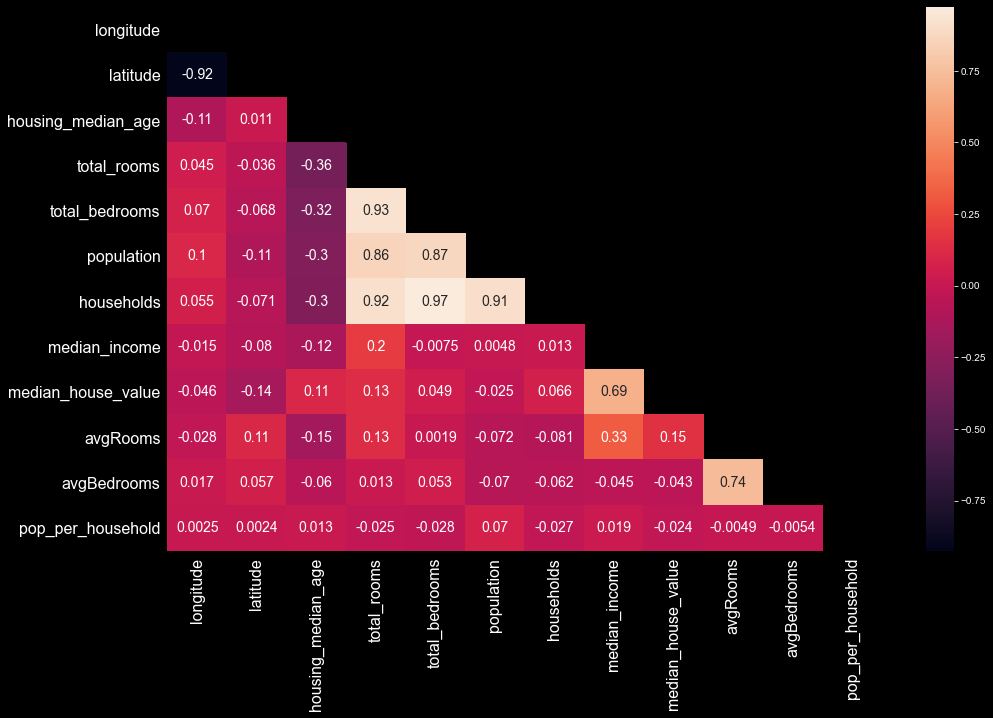

In [47]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.style.use('dark_background')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

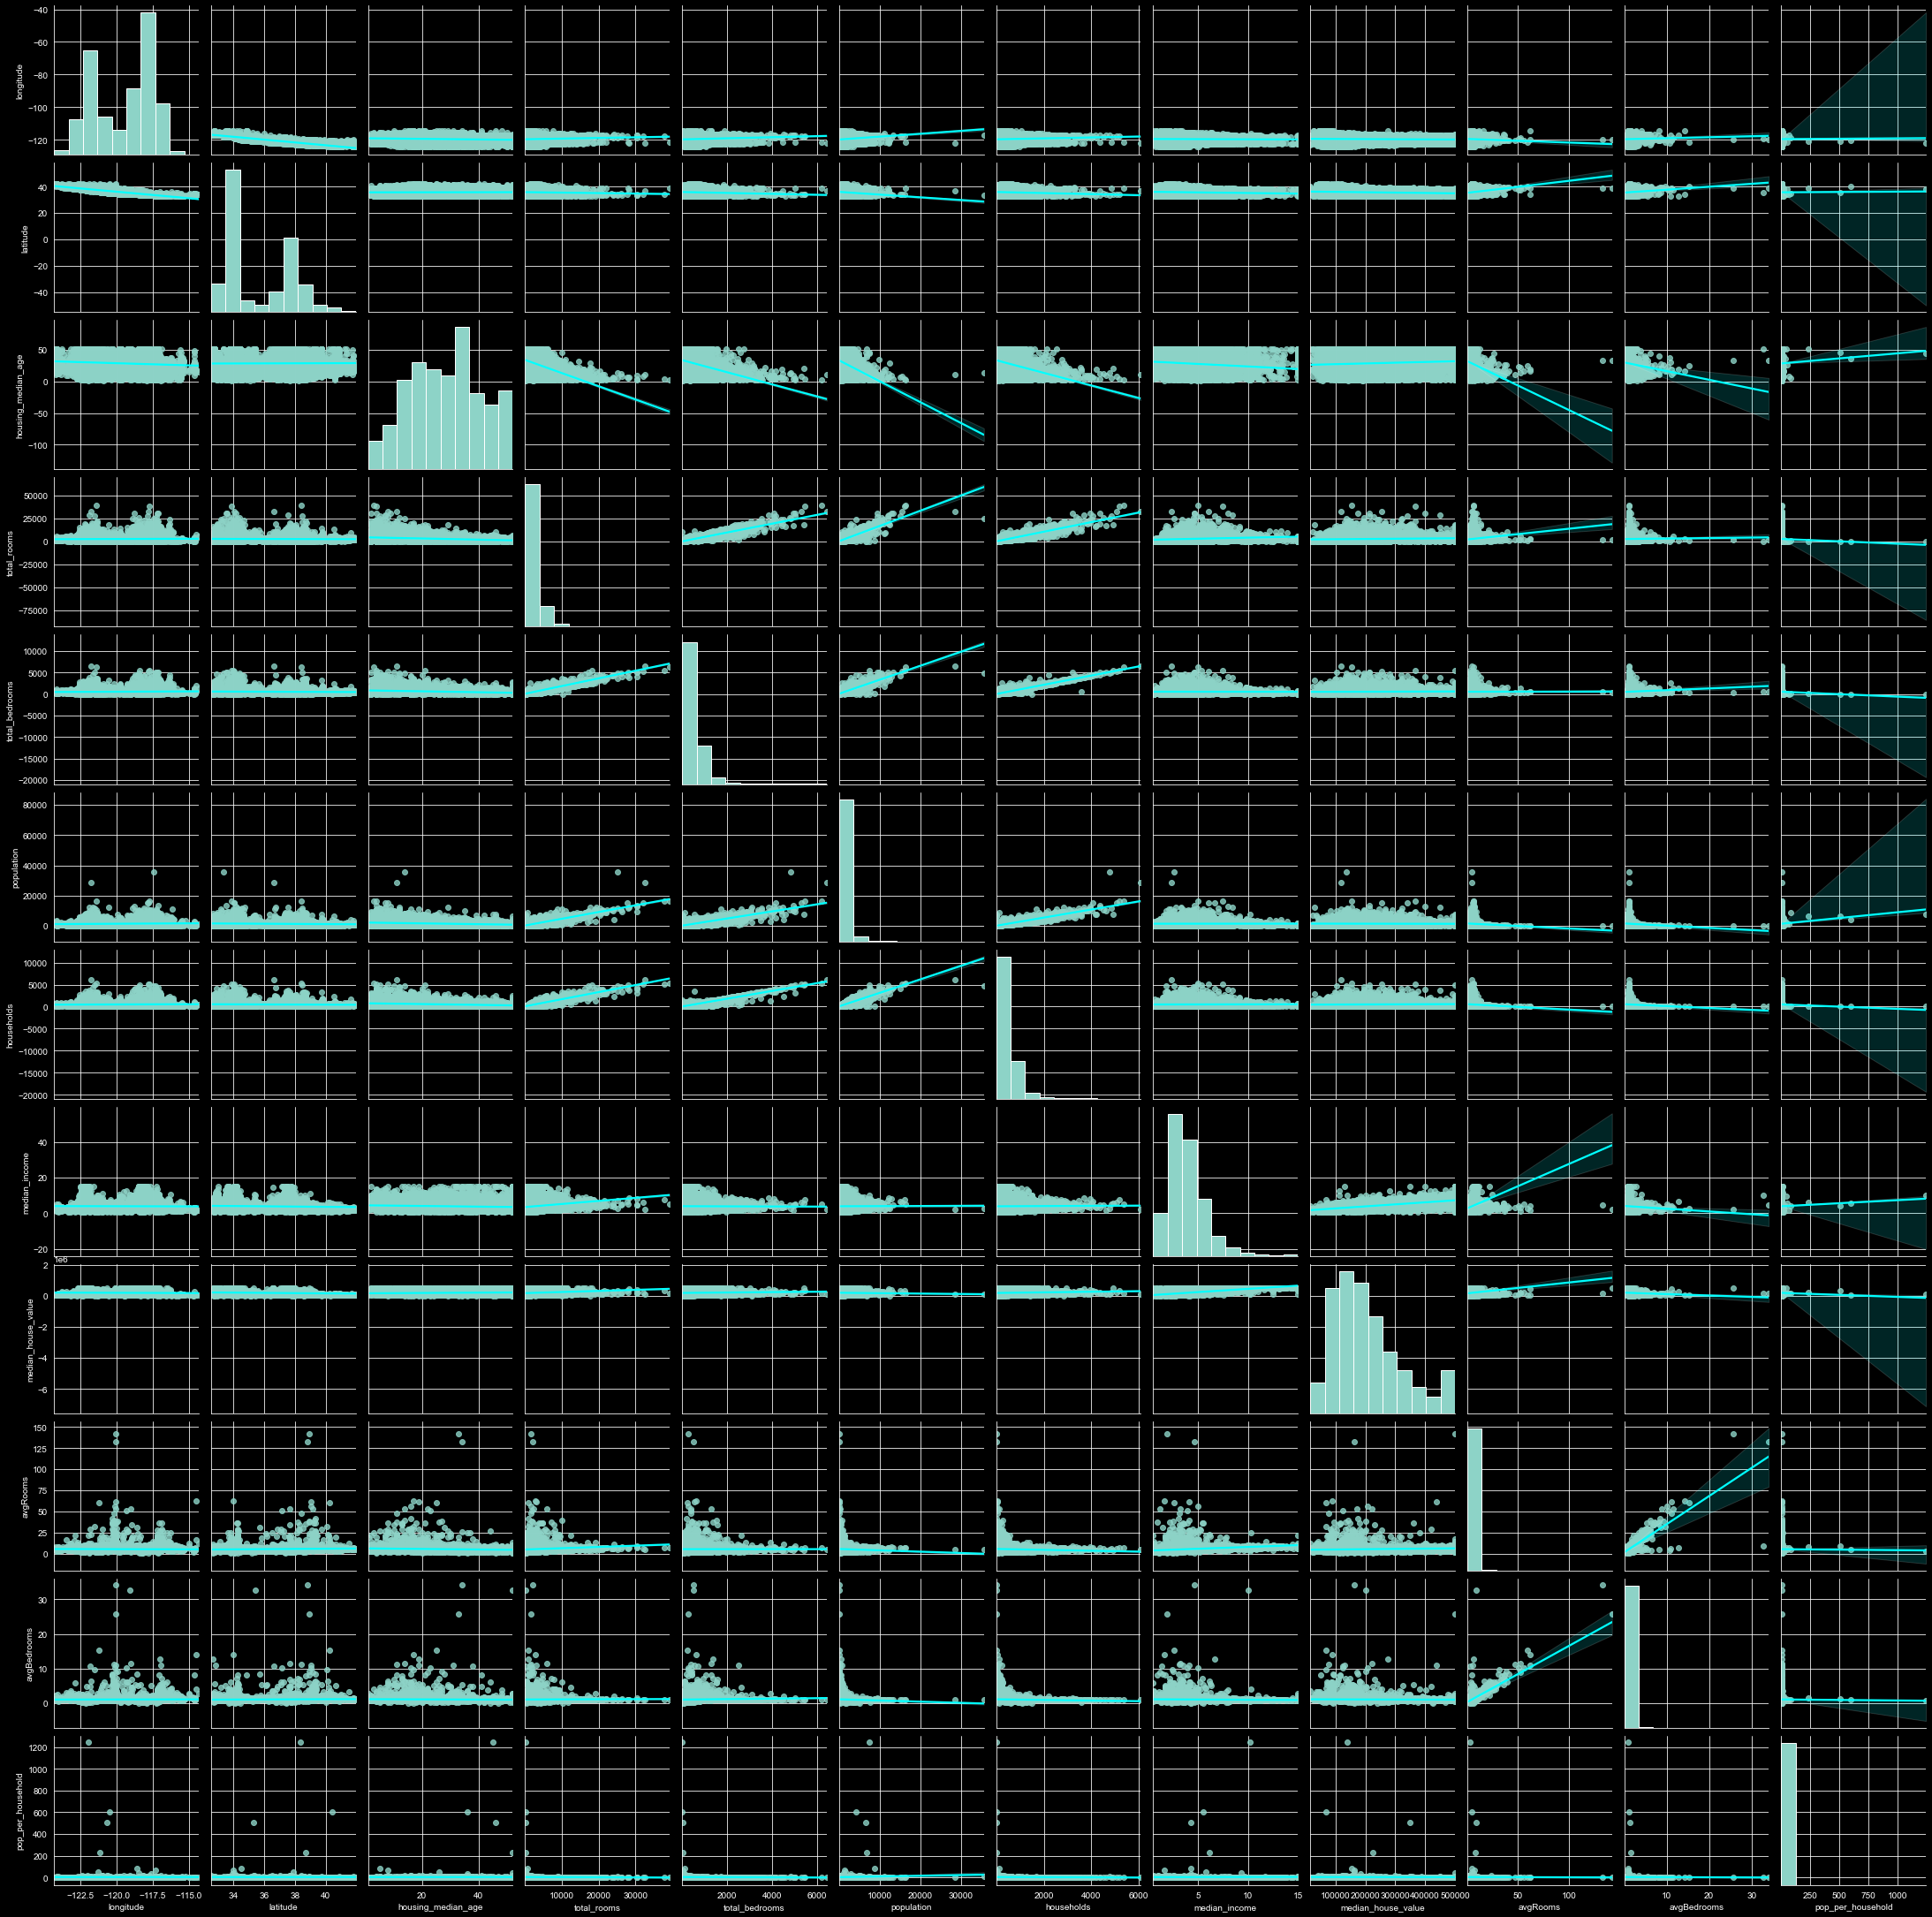

Wall time: 2min 55s


In [52]:
%%time

sns.pairplot(df, kind = 'reg', plot_kws={'line_kws': {'color': 'cyan'}})
plt.show()

## Training and Test Dataset Split

In [48]:
prices = df['median_house_value']
features = df.drop('median_house_value', axis = 1)
features = df.drop('ocean_proximity', axis = 1)



X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2)



In [49]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns=['Coef'])

Intercept 1.6589183360338211e-09


Coef
longitude           1.903496e-11
latitude            1.741017e-11
housing_median_age  3.829947e-13
total_rooms        -6.336093e-15
total_bedrooms      1.053026e-13
population         -4.847509e-14
households          6.684652e-14
median_income       1.698985e-11
median_house_value  1.000000e+00
avgRooms            6.349016e-12
avgBedrooms        -1.698999e-11
pop_per_household   3.965747e-13

In [50]:
print('Training Regression:', regr.score(X_train, y_train))
print('Test Regression:', regr.score(X_test, y_test))

Training Regression: 1.0
Test Regression: 1.0
